Observations and Insights

In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
#Checking the number of mice.
len(study_df["Mouse ID"].unique())

249

In [4]:
#Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = study_df[study_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice["Mouse ID"].value_counts()

g989    5
Name: Mouse ID, dtype: int64

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice.loc[:, "Mouse ID"].unique()

array(['g989'], dtype=object)

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = study_df.loc[study_df['Mouse ID'] != 'g989']
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame to ensure offending mouse was removed
len(clean_df["Mouse ID"].unique())

248

Summary Statistics

Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen.

In [8]:
#Filter cleaned data frame by 'Drug Regimen' column
clean_df.loc[:, 'Drug Regimen'].unique()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

grouped_DR = clean_df.groupby(['Drug Regimen']) 

# mean, median, variance, standard deviation, and SEM of the tumor volume

mean_numpy = grouped_DR['Tumor Volume (mm3)'].mean()
median_numpy = grouped_DR['Tumor Volume (mm3)'].median()
var_numpy = grouped_DR['Tumor Volume (mm3)'].var()
std_numpy = grouped_DR['Tumor Volume (mm3)'].std()
sem_numpy = grouped_DR['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
data1 = {
    'Mean': mean_numpy,
    'Median': median_numpy,
    'Variance': var_numpy,
    'Stdv': std_numpy,
    'SEM': sem_numpy
}

summary1 = pd.DataFrame(data1)
summary1

format_dict = {'Mean':'{0:,.3f}', 'Median': '{:,.3f}', 'Variance': '{:,.3f}', 'Stdv': '{:,.3f}', 'SEM': '{:,.3f}'}
summary1.style.format(format_dict)


,Mean,Median,Variance,Stdv,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [9]:
#Using the aggregation method, produce the same summary statistics in a single line
grouped_DR = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].aggregate([np.mean, np.median, np.var, np.std, 'sem'])
grouped_DR

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Bar and Pie Charts

Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

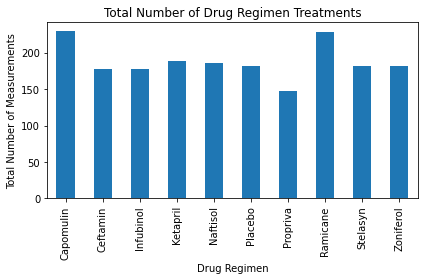

In [10]:
#Use the group by method on the values in 'Drug Regimen'
grouped_DR = clean_df.groupby('Drug Regimen')

#Find the count
count_DR = grouped_DR['Drug Regimen'].count()

#Create a bar chart based off of the the group series from count_DR
panda_chart = count_DR.plot(kind='bar')
panda_chart.set_xlabel("Drug Regimen")
panda_chart.set_ylabel("Total Number of Measurements")
plt.title("Total Number of Drug Regimen Treatments")
plt.tight_layout()
plt.savefig("../Images/BarChartPandas.png")
plt.show()

Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

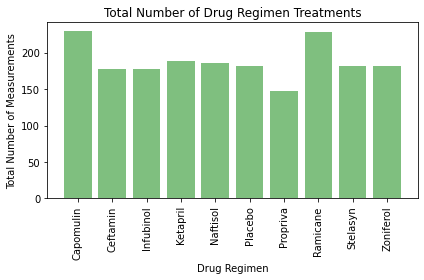

In [11]:
#Create a grouped based on the values in 'Drug Regimen'
DR_group = clean_df.groupby('Drug Regimen')

#Find the count as the y-axis and set the x-axis range by lenghth of total count of the column 'Drug Regimen'
total_DR = DR_group['Drug Regimen'].count()
x_axis = np.arange(len(total_DR))

#Generate a bar plot using Pyplot
plt.figure(figsize=(6,4))
plt.bar(x_axis, total_DR, color='g', alpha=0.5, align="center")

# Tell matplotlib where we would like to place each of our x axis headers using list comprehension
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation="vertical")

# Set a Title and labels
plt.title("Total Number of Drug Regimen Treatments")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")
plt.tight_layout()
plt.savefig("../Images/BarChartPyPlot.png")
plt.show()

Generate a pie plot showing the distribution of female versus male mice using pandas.

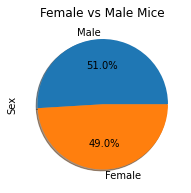

In [12]:
#Find the count
count_gen = clean_df['Sex'].value_counts()

#Plot on pie chart using pandas 
panda_chartpie=count_gen.plot(kind='pie', subplots=True, shadow=True, figsize=(5,3), autopct='%1.1f%%')
plt.title("Female vs Male Mice")
plt.savefig("../Images/PieChartPandas.png")
plt.show()

Generate a pie plot showing the distribution of female versus male mice using pyplot.

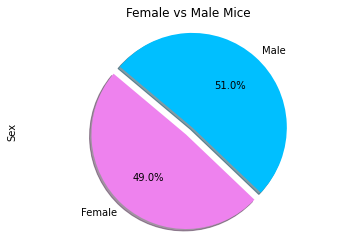

In [13]:
#Find the count
count_gen = clean_df['Sex'].value_counts()

#Isolate total count for female vs males in single variable
count_m = clean_df.loc[clean_df['Sex'] == "Male"]
#print(len(count_m.value_counts()))
count_f = clean_df.loc[clean_df['Sex'] == "Female"]
#print(len(count_f.value_counts()))

#Labels for the sections of our pie chart
labels = ["Female", "Male"]
# The values of each section of the pie chart
sizes = [49, 51]
# The colors of each section of the pie chart
colors = ["violet", "deepskyblue"]
# Tell matplotlib to seperate the "Male" section from the others
explode = (0, 0.1)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Female vs Male Mice")
plt.ylabel("Sex")
plt.axis("equal")
plt.savefig("../Images/PieChartPyPlot.png")
plt.show()

Quartiles, Outliers, and Boxplots

Calculate the final tumor volume of each mouse across four of the treatment regimens:  
Capomulin, Ramicane, Infubinol, and Ceftamin

In [14]:
#Filter data for treatment by Capomulin

capomulin = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin', :]
capomulin.head()

# Start by getting the last (greatest) timepoint for each mouse

lastctp = capomulin.groupby("Mouse ID")["Timepoint"].max()
convert_df = pd.DataFrame(lastctp)

#Merge this group df with the original dataframe to get the tumor volume at the last timepoint
t_vol = pd.merge(convert_df, clean_df, on=("Mouse ID", "Timepoint"), how = "left")

In [15]:
#Apply the same methods used for drug regimen capomulin for ramicane
ramicane = clean_df.loc[clean_df['Drug Regimen'] == 'Ramicane', :]

# Start by getting the last (greatest) timepoint for each mouse
lastrtp = ramicane.groupby("Mouse ID")["Timepoint"].max()
convert_df2 = pd.DataFrame(lastrtp)

#Merge this group df with the original dataframe to get the tumor volume at the last timepoint
t_vol2 = pd.merge(convert_df2, clean_df, on=("Mouse ID", "Timepoint"), how = "left")

In [16]:
#Apply the same methods used for drug regimen capomulin for infubinol
infubinol = clean_df.loc[clean_df['Drug Regimen'] == 'Infubinol', :]

# Start by getting the last (greatest) timepoint for each mouse
lastitp = infubinol.groupby("Mouse ID")["Timepoint"].max()
convert_df3 = pd.DataFrame(lastitp)

#Merge this group df with the original dataframe to get the tumor volume at the last timepoint
t_vol3 = pd.merge(convert_df3, clean_df, on=("Mouse ID", "Timepoint"), how = "left")

In [17]:
#Apply the same methods used for drug regimen capomulin for ceftamin
ceftamin = clean_df.loc[clean_df['Drug Regimen'] == 'Ceftamin', :]

# Start by getting the last (greatest) timepoint for each mouse
lastcetp = ceftamin.groupby("Mouse ID")["Timepoint"].max()
convert_df4 = pd.DataFrame(lastcetp)

#Merge this group df with the original dataframe to get the tumor volume at the last timepoint
t_vol4 = pd.merge(convert_df4, clean_df, on=("Mouse ID", "Timepoint"), how = "left")

In [18]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes# add subset 

tumor_cap = t_vol["Tumor Volume (mm3)"]
quartile_cap = tumor_cap.quantile([.25, .5, .75])
lowerq = quartile_cap[0.25]
upperq = quartile_cap[0.75]
iqr = upperq-lowerq

sum_cap_table = pd.DataFrame({"Lower Quartile": lowerq,
                              "Upper Quartile": upperq,
                              "IQR": iqr}, index=['Tumor Vol: Capomulin'])

print(sum_cap_table)

###############################Part 2#######################################

#Ramicane
tumor_ram = t_vol2["Tumor Volume (mm3)"]
quartile_ram = tumor_ram.quantile([.25, .5, .75])
lowerqr = quartile_ram[0.25]
upperqr = quartile_ram[0.75]
iqr_ram = upperqr-lowerqr

sum_ram_table = pd.DataFrame({"Lower Quartile": lowerqr,
                              "Upper Quartile": upperqr,
                              "IQR": iqr_ram}, index=['Tumor Vol: Ramicane'])
print(sum_ram_table)

################################Part 3#####################################

#Infubinol
tumor_i = t_vol3["Tumor Volume (mm3)"]
quartile_i = tumor_i.quantile([.25, .5, .75])
lowerqi = quartile_i[0.25]
upperqi = quartile_i[0.75]
iqr_i = upperqi-lowerqi

sum_i_table = pd.DataFrame({"Lower Quartile": lowerqi,
                              "Upper Quartile": upperqi,
                              "IQR": iqr_i}, index=['Tumor Vol: Infubinol'])
print(sum_i_table)

################################Part 4#####################################

#Ceftamin
tumor_cef = t_vol4["Tumor Volume (mm3)"]
quartile_cef = tumor_cef.quantile([.25, .5, .75])
lowerqcef= quartile_cef[0.25]
upperqcef = quartile_cef[0.75]
iqr_cef = upperqcef-lowerqcef

sum_cef_table = pd.DataFrame({"Lower Quartile": lowerqcef,
                              "Upper Quartile": upperqcef,
                              "IQR": iqr_cef}, index=['Tumor Vol: Ceftamin'])
print(sum_cef_table)

                      Lower Quartile  Upper Quartile       IQR
Tumor Vol: Capomulin       32.377357        40.15922  7.781863
                     Lower Quartile  Upper Quartile       IQR
Tumor Vol: Ramicane        31.56047       40.659006  9.098537
                      Lower Quartile  Upper Quartile        IQR
Tumor Vol: Infubinol       54.048608       65.525743  11.477135
                     Lower Quartile  Upper Quartile        IQR
Tumor Vol: Ceftamin       48.722078        64.29983  15.577752


In [19]:
#Determine whether there are outliers present in the IQR by setting LB and UB for all drug regimens

#Capomulin 
lower_bound1 = lowerq - (1.5*iqr)
upper_bound1 = upperq + (1.5*iqr)

outlier_cap = pd.DataFrame({"Lower Bound": lower_bound1,
                            "Upper Bound": upper_bound1}, index=['Possible Outliers: Capomulin'])
print(outlier_cap)

###############################Part 2#######################################

#Ramicane
lower_bound2 = lowerqr - (1.5*iqr_ram)
upper_bound2 = upperqr + (1.5*iqr_ram)

outlier_ram = pd.DataFrame({"Lower Bound": lower_bound2,
                            "Upper Bound": upper_bound2}, index=['Possible Outliers: Ramicane'])
print(outlier_ram)

###############################Part 3#######################################

#Infubinol
lower_bound3 = lowerqi - (1.5*iqr_i)
upper_bound3 = upperqi + (1.5*iqr_i)

outlier_i = pd.DataFrame({"Lower Bound": lower_bound3,
                          "Upper Bound": upper_bound3}, index=['Possible Outliers: Infubinol'])
print(outlier_i)

###############################Part 4#######################################

#Ceftamin
lower_bound4 = lowerqcef - (1.5*iqr_cef)
upper_bound4 = upperqcef + (1.5*iqr_cef)

outlier_cef = pd.DataFrame({"Lower Bound": lower_bound4,
                          "Upper Bound": upper_bound4}, index=['Possible Outliers: Ceftamin'])
print(outlier_cef)

                              Lower Bound  Upper Bound
Possible Outliers: Capomulin    20.704562    51.832015
                             Lower Bound  Upper Bound
Possible Outliers: Ramicane    17.912664    54.306811
                              Lower Bound  Upper Bound
Possible Outliers: Infubinol    36.832905    82.741446
                             Lower Bound  Upper Bound
Possible Outliers: Ceftamin     25.35545    87.666458


Generate a box plot of the final tumor volume of each mouse across four regimens of interest.

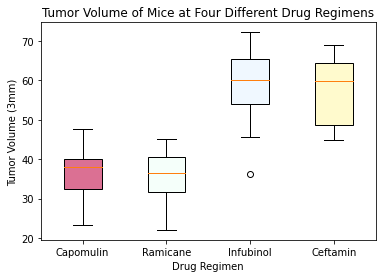

In [20]:
#Want to show the final tumor volume, need to use variable that was set to filter out tumor volume

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Mice at Four Different Drug Regimens')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume (3mm)')
x_axis = [tumor_cap, tumor_ram, tumor_i, tumor_cef]
bplot1 = ax1.boxplot(x_axis, vert=True, patch_artist=True, labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

# fill with colors
colors = ['palevioletred', 'mintcream', 'aliceblue', 'lemonchiffon']
for bplot in (bplot1):
    for patch, color in zip(bplot1['boxes'], colors):
        patch.set_facecolor(color)
plt.savefig("../Images/BoxPlotAllDrugRegimens.png")
plt.show()

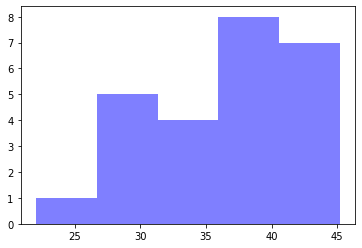

In [34]:
x = tumor_ram
num_bins = 5
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

Line and Scatter Plots

Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin.

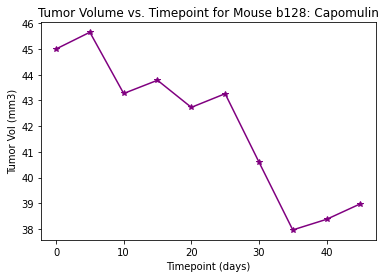

In [36]:
#Pick one mouse from filtered capomulin data and isolate for that mouse ID
filter_1mouse = capomulin.loc[clean_df['Mouse ID'] == 'b128', :]
# filter_1mouse.head()

#Set x-axis to Timepoint and y-axis to Tumor Volume
lp_tum = filter_1mouse["Tumor Volume (mm3)"]
lp_time = filter_1mouse["Timepoint"]
plt.plot(lp_time, lp_tum, marker= "*", color="purple")
plt.title("Tumor Volume vs. Timepoint for Mouse b128: Capomulin")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Vol (mm3)")
plt.savefig("../Images/LineChartMouseb128.png")
plt.show()

Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen.

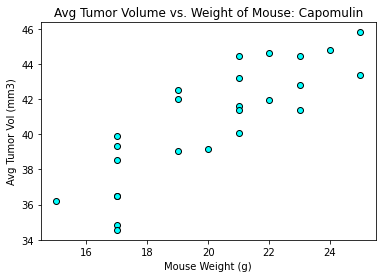

In [22]:
#NOTE: Do I need to apploy a filter, then groupby, then take the average of the groupby?

#Use groupby on filtered data for capomulin drug regimen and find the average
groupby_avg = capomulin.groupby(['Mouse ID']).mean()

#Set the x-axis to weight data and the y-axis to the average tumor volume
sp_weight = groupby_avg['Weight (g)']
sp_tum = groupby_avg['Tumor Volume (mm3)']
plt.scatter(sp_weight, sp_tum, marker="o", facecolors="cyan", edgecolors="black")
plt.title("Avg Tumor Volume vs. Weight of Mouse: Capomulin")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Avg Tumor Vol (mm3)")
plt.savefig("../Images/ScatterPlotCap.png")
plt.show()

Correlation and Regression

Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen.

The correlation coefficient between tumor volume and mouse weight is 0.84
The r-squared is: 0.7088568047708717


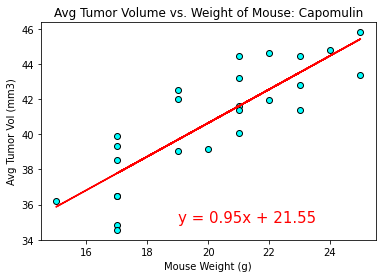

In [23]:
# Add the linear regression equation and line to plot to scatter plot from above

(slope, intercept, rvalue, pvalue, stderr) = linregress(sp_weight, sp_tum)
regress_values = sp_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(sp_weight,regress_values,"r-")
plt.scatter(sp_weight, sp_tum, marker="o", facecolors="cyan", edgecolors="black")
plt.title("Avg Tumor Volume vs. Weight of Mouse: Capomulin")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Avg Tumor Vol (mm3)")
plt.annotate(line_eq,(19,35),fontsize=15,color="red")
print(f"The correlation coefficient between tumor volume and mouse weight is {round(st.pearsonr(sp_weight,sp_tum)[0],2)}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/ScatterPlotCapwithLinearRegression.png")
plt.show()